## undersampling
- class imbalanced의 방법
- 평소의 데이터는 적기 때문에 그렇게 많이 사용하는 방법은 아님

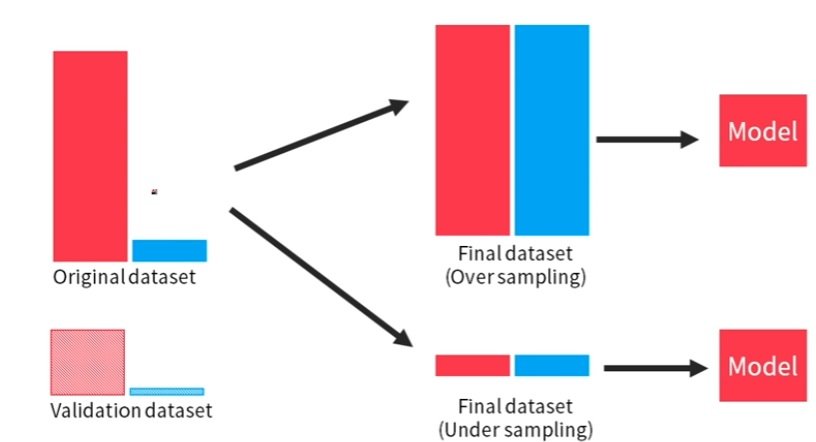

## 기법의 종류
- Random Under Sampling
  - Random하게 데이터를 undersampling하는 것


- Tomek Links
  - Majority data와 minority data의 거리가 근접해있을 때 majority data를 제거하는 방법
  - undersampling 기법에서 가장 많이 쓰임
  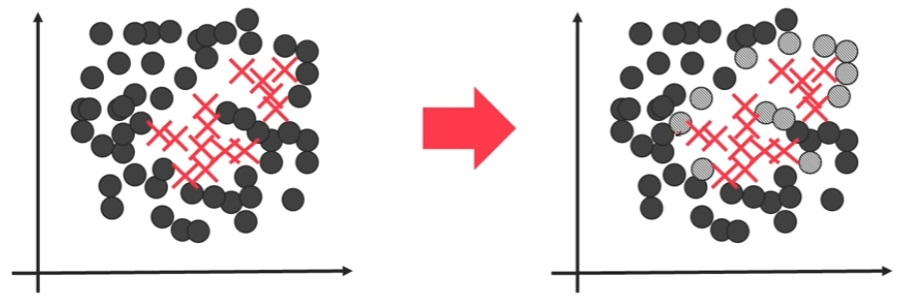

- EasyEnsemble
  - Majority data와 minority data를 동일 수만큼 random sampling
  - 추출된 데이터를 classifier를 통해 학습
  - 위 과정을 k번 반복
  
  
- BalanceCascade
  - EasyEnsemble과 같이 데이터를 n번 random sampling 후 학습
  - n-1번째 시행 결과에서 올바르게 분류되는 majoriry data를 undersampling
  - undersampling된 수만큼 negative data를 random sampling하여 추가시켜 n번째 학습 진행

#### undersampling의 장단점
- 학습에 필요하지 않은 데이터를 제거함으로 학습 속도 향상을 가져올 수 있음
- Decision boundary 부근에 있는 데이터를 제거했을 때 학습에 악영향을 미칠 수 있음
  - Decision boundary 자체가 제대로 되어있지 않은 케이스

## hybrid resampling 기법
- over/under sampling을 혼합하여 사용
- SMOTE+Tomek Link를 혼합하여 sampling

### SMOTE-IPF
- SMOTE의 단점을 지적(noise data와 borderline instance가 classifier의 성능을 저하시킴)
- Iterarive Partitioning Filter(IPF)라는 ensemble 기반 noise filter를 SMOTE와 결합
- minority에 대하여 SMOTE 적용
- Cross Validation을 통해 여러 모델을 학습하고 평가하여 여러 모델이 오분류하는 데이터를 noise로 구분
- Noise 데이터를 제거하고 이 과정을 반복
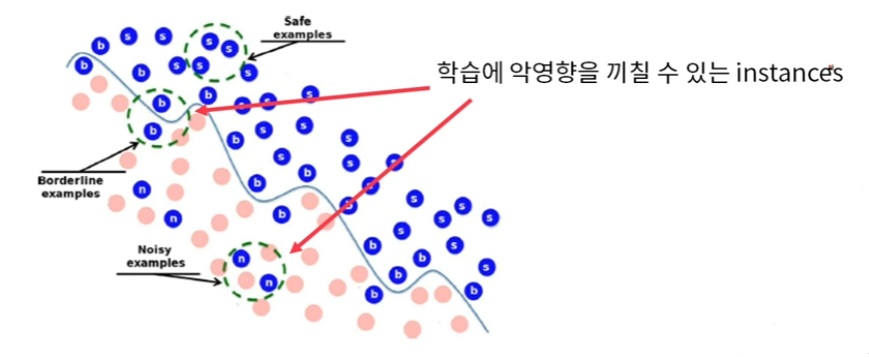

### DBSM
- DBSCAN을 clustering 수행, 생성된 cluster 중 majority data로 이루어진 cluster와 majority data와 minority data가 섞여있는 cluster에서 majority data를 undersampling
- Minority data는 SMOTE 적용

### Classifier based hybrid resampling method
- 기존의 SMOTE와 같은 oversampling 기법들은 전체 minority 데이터에 대해 oversampling 시키는 것이기 때문에 의사 결정 경계가 과하게 커지는 경향이 있으며, 기존 데이터 분포를 과하게 왜곡시키는 경향이 있음
- 기존의 데이터 분포를 최대한 유지하면서 더 좋은 의사 결정 경계를 만들 수 있는 방법이 필요
- 의사 결정 경계 부근에 있는 데이터만을 조정함으로 데이터 분포를 해치지 않으면서 더 좋은 의사 결정 관계를 만들도록 함

1. 학습데이터와 같은 크기로 복원 추출을 통해 새로운 데이터셋을 만들어 모델을 학습시키고, 이 과정에서 추출되지 않은 데이터를 가지고 학습한 모델로 분류를 수행함
2. 분류를 했을 때, 오분류된 majority 데이터와 minority 데이터를 저장함
3. 1번과 2번 과정을 k번 반복하는 과정에서 오분류된 majority 데이터와 minority 데이터를 모음
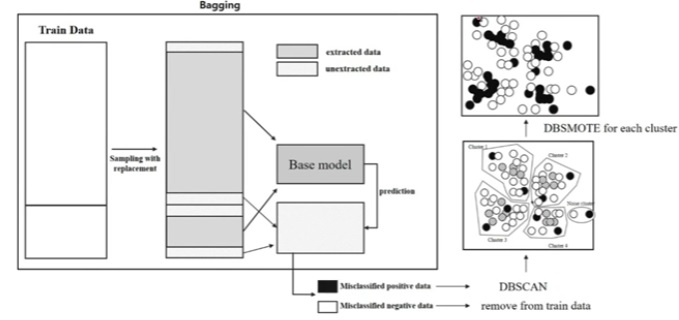

4. 오분류된 majority 데이터는 모두 제거하는 undersampling을 수행함
5. 오분류된 minority 데이터에 대해서는 DBSCAN clustering 방법을 이용하여 군집분석을 수행하고, noise 군집을 제외한 각 군집 안에서 DBSCAN을 이용하여 oversampling을 수행함
  - 이때, 각 군집에서 중심점에서 가장 멀리 있거나 가장 가까이에 있는 data의 10%를 제외하고 DBSMOTE를 적용함